# TITANIC SURVIVAL PREDICTION 


# IMPORTING LIBRARIES

In [1]:

#Numpy for working with mathematical operations 
import numpy as np

#seaborn for data visualization 
import seaborn as sns


In [2]:
#pandas for data analysis 
import pandas as pd

#matplot for data visualization 
import matplotlib.pyplot as plt

# to avoid any warnings during the compilation of code
import warnings
warnings.filterwarnings('ignore')

In [3]:
#reading a file 

df = pd.read_csv('Titanic-Dataset.csv')

# INITIAL OBSERVATION 

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#shape is used to fetch dimensions of the object

df.shape

(891, 12)

In [6]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
#value_count feature is used reture the count of repeating occurance of unique value

df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
df.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [11]:
#Crosstab :- it is a feature of python used to compute a simple cross tables

pd.crosstab(df['Sex'],df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


# HANDLING NULL VALUES

In [12]:
#isnull is used to check the presence of NULL values in the dataset

df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
#sum() is used to see the collective count of the values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# CHECKING MISSING VALUES USING HEATMAP

<Axes: >

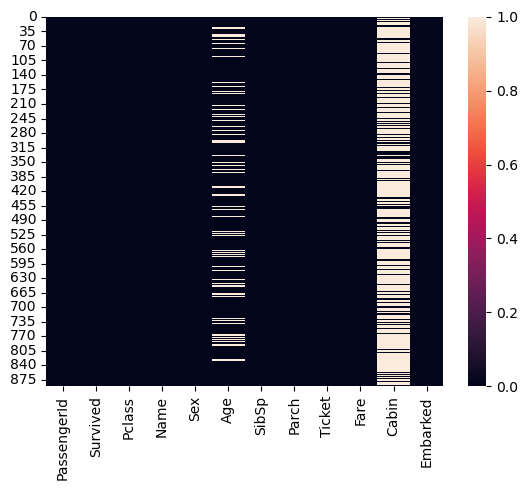

In [14]:
#heatmap is use to plot rectangular data in the form of a color coded matrix

sns.heatmap(df.isnull())

# DATA CLEANING 

In [15]:
# dropna is used to remove rows that contains NULL value

df = df.dropna()

In [16]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [17]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [18]:
#drop feature removes the features which are completely unrelated

df.drop(['PassengerId','Pclass', 'Name','Parch','Ticket','Fare','Cabin','SibSp'],axis=1,inplace=True)

In [19]:
df['Age'].describe()

count    183.000000
mean      35.674426
std       15.643866
min        0.920000
25%       24.000000
50%       36.000000
75%       47.500000
max       80.000000
Name: Age, dtype: float64

# DATA VISUALIZATION AFTER CLEANING 

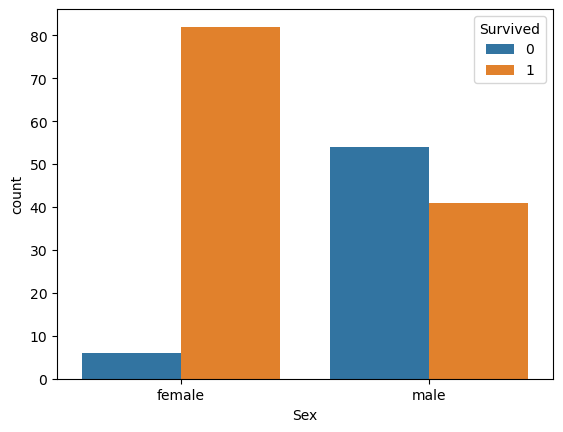

In [21]:
# plotting a graph based on Survival of passengers based on thier respective genders(0 represents female and 1 represents male)

sns.countplot(x=df['Sex'],hue=df['Survived']) 
plt.show()


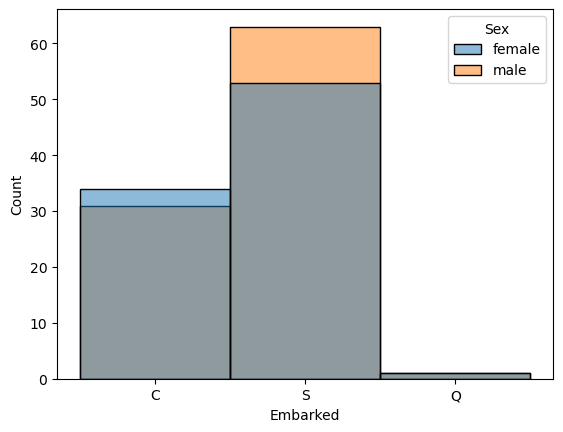

In [22]:
# Showing Distribution of Embarked Sex wise

sns.histplot(x=df['Embarked'],hue=df['Sex'])
plt.show()

[]

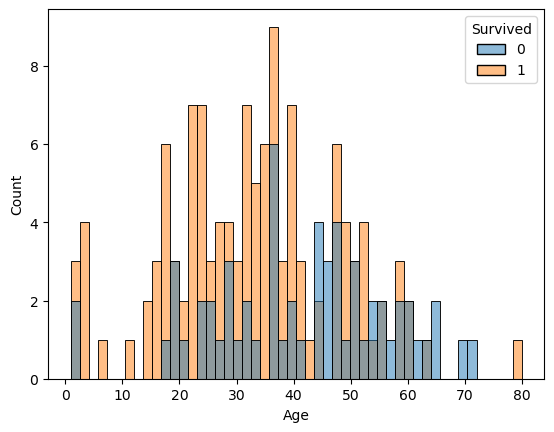

In [23]:
# collective representation of survival rate with respect to age 

sns.histplot(data=df, x='Age', hue='Survived',bins = 50)
plt.plot()

In [24]:
df['Age_Group'] = df['Age'].apply(lambda x: 'New Born' if 0 < x <= 2 else 'Kid' if 2 < x <= 16 \
                                      else 'Youngsters' if 16 < x <= 30 else \
                                      'Middle_Aged' if 30 < x <= 45 else 'Elders' if 45 < x <= 60 \
                                      else 'SeniorCitizens' if x > 60 else 'Data Invalid')

# Update the existing columns with binary values based on conditions
df['New Born'] = (df['Age_Group'] == 'New Born').astype(int)
df['Kid'] = (df['Age_Group'] == 'Kid').astype(int)
df['Youngsters'] = (df['Age_Group'] == 'Youngsters').astype(int)
df['Middle_Aged'] = (df['Age_Group'] == 'Middle_Aged').astype(int)
df['Elders'] = (df['Age_Group'] == 'Elders').astype(int)
df['SeniorCitizens'] = (df['Age_Group'] == 'SeniorCitizens').astype(int)

In [25]:
df

,Survived,Sex,Age,Embarked,Age_Group,New Born,Kid,Youngsters,Middle_Aged,Elders,SeniorCitizens
1,1,female,38.0,C,Middle_Aged,0,0,0,1,0,0
3,1,female,35.0,S,Middle_Aged,0,0,0,1,0,0
6,0,male,54.0,S,Elders,0,0,0,0,1,0
10,1,female,4.0,S,Kid,0,1,0,0,0,0
11,1,female,58.0,S,Elders,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
871,1,female,47.0,S,Elders,0,0,0,0,1,0
872,0,male,33.0,S,Middle_Aged,0,0,0,1,0,0
879,1,female,56.0,C,Elders,0,0,0,0,1,0
887,1,female,19.0,S,Youngsters,0,0,1,0,0,0


[]

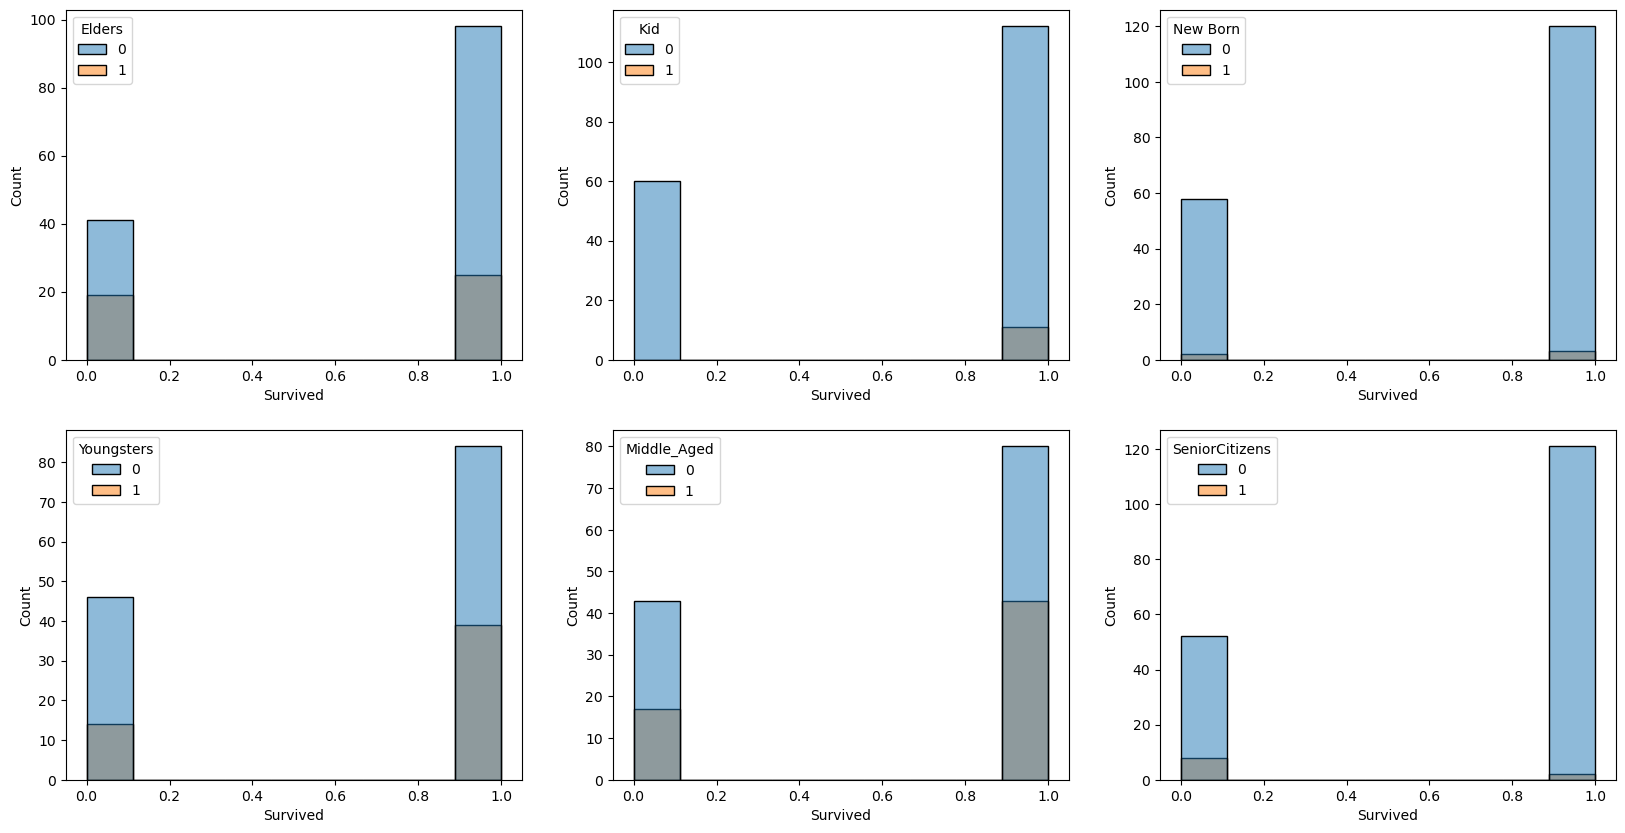

In [42]:
# ploting diffrent subplots for all the diffrent age groups for seperate analysis and visualization of diffrent age groups


plt.figure(figsize= (20,10))

plt.subplot(2,3,1)
sns.histplot(x=df['Survived'],hue=df['Elders'])


plt.subplot(2,3,2)
sns.histplot(x=df['Survived'],hue=df['Kid'])


plt.subplot(2,3,3)
sns.histplot(x=df['Survived'],hue=df['New Born'])


plt.subplot(2,3,4)
sns.histplot(x=df['Survived'],hue=df['Youngsters'])


plt.subplot(2,3,5)
sns.histplot(x=df['Survived'],hue=df['Middle_Aged'])


plt.subplot(2,3,6)
sns.histplot(x=df['Survived'],hue=df['SeniorCitizens'])


plt.plot()


           